## Project 2 - Supervised Learning - Gradiant Descent and Classification
### Due: 4/2/2021 Frinday 11:59 PM

### Task
This project is broadly breakinto two parts: 
1. Gradient Descent Implementation - the task is to implement the gradien descent function to find all possible local mamina and gloabl minimum coordinates. 
2. Wine Quality Classifiaction Implementation - the task is to implement three classifiers, KNN, LDA, and Logistic Regresion, to classify the quality of red wine using a given data `winequality-red.csv`.

### Descriptions & Rules
1. All work must be your own. Any evidence of copying, collaborating, and cheating will result 0. 
2. This project does not require a report. However, all work and results must be discussed - simply answering or stating results is not acceptable. 
3. **The project will not allow any extenstions** - except a case of health and other emergencies. You must submit the project as incompletion if you do not finish on time. 
4. You must submit the **jupyter notebook** file and the **exported HTML** file. 
5. All codes must be excutable - if the code does not work, you will get 0 for that particular code. 

### Gradient Descent Implementation. 

We are going to implement a standard gradient decent optimization function `my_GradDes(x,y,z,theta,learning_rate,iteration)` to find all possible local maxima and global maximum coordinates. 

Data Set: `P2_1.csv` has four features. We have $x=(-4.0,4.0)$ and $y=(-4.0,4.0)$, the true $z$ value is a function of $x$ and $y$, $z=f(x,y)$, and $z_pred$ which is a predicted value of $z$. Below a 3-D plot is povided. 

Requirement:
1. The cost function: $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h(\theta)^i-y^i))^2$
2. Gradient: $\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h(\theta)^i-y^i)).X_j^i$

where $m=$number of observation. 


Task:
1. Test with the learning rate $\eta=[0.01, 0.05, 0.1, 1]$. 


Required Result: For each $\eta$, report
1. Iteration #
2. Did it overshoot?
3. Total number of local minima
4. The coordinates ($x,y$) for all local minima and global mimimum

Points: 
- Code: 25 points
- Test: 5 points
- Answers: 20 points

<IPython.core.display.Javascript object>


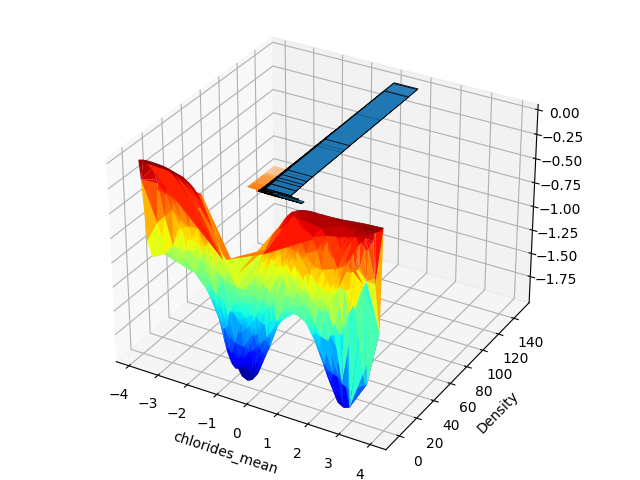

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
df = pd.read_csv('data/P2_1.csv')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()

In [3]:
df

,Unnamed: 0,x,y,z,z_pred
0,0,3.325447,-0.869890,-0.048580,-0.063702
1,1,0.199415,-1.064081,-0.865777,-0.883839
2,2,0.623499,1.176377,-0.796616,-0.760264
3,3,0.294015,-0.907471,-0.734876,-0.747532
4,4,-0.613311,-2.226039,-1.179802,-1.155625
...,...,...,...,...,...
1494,1494,-2.239913,0.875061,-0.336937,-0.325980
1495,1495,-0.990434,0.367857,-1.009842,-1.013032
1496,1496,-0.890459,0.319588,-1.091176,-1.072742
1497,1497,1.925576,0.162451,-0.063575,-0.056576


In [9]:
X = df['x'].to_numpy()
Y = df['y'].to_numpy()
Z = df['z'].to_numpy()

In [12]:
import numpy as np
x_std = np.std(X)
y_std = np.std(Y)

In [14]:
import math
def gaussian_func(A , a , b):
    x_term = (x-a)**2 / (2 * x_std)
    y_term = (y-b)**2 / (2 * y_std)
    res = A * math.exp(-(x_term + y_term))
    return res    

1.6309857542685489

In [ ]:
### Code Starts Here
def my_Gradient(x,y,z,theta,learning_rate,iteration):
    x_curr = x
    y_curr = y
    for i in range(iterations):
        z_predicted = 
    

Answer the result here:

### Classification - Wine Quality 

In the given data, `winequality-red.csv`,there are 12 features and the target is “quality”. You are going to implement three classifiers to classify the wine quality. 

A. Exploratory Data Analysis: (10 pts)

- a. Find missing value features and impute the value using mean, median, and 0. 
- b. Make histograms and determine which method in A-a is the most appropriate. 
- c. The wine quality is rated from 3 to 8. Categorize the quality to be a binary categorical data as good and bad.

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('data/winequality-red.csv')
features = df.columns

In [3]:
df.isnull().sum()

fixed acidity            19
volatile acidity         32
citric acid             170
residual sugar           38
chlorides                51
free sulfur dioxide      80
total sulfur dioxide     57
density                  58
pH                       34
sulphates                61
alcohol                  22
quality                   0
dtype: int64

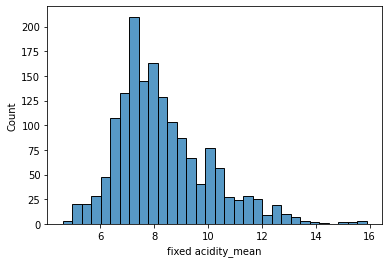

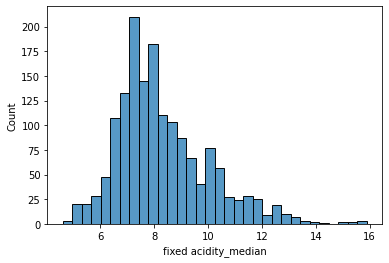

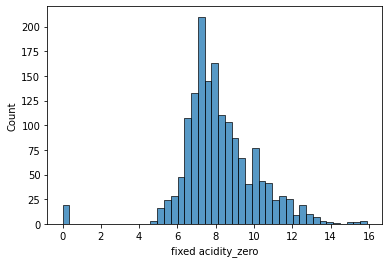

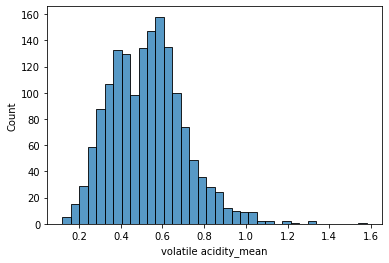

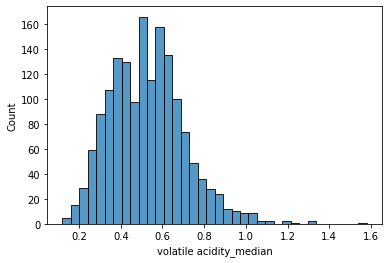

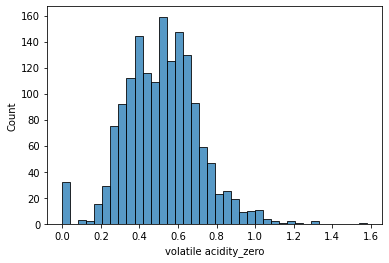

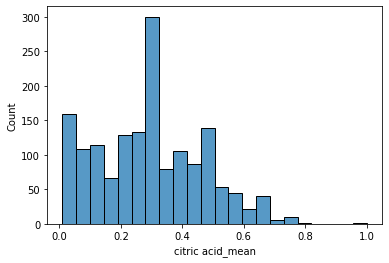

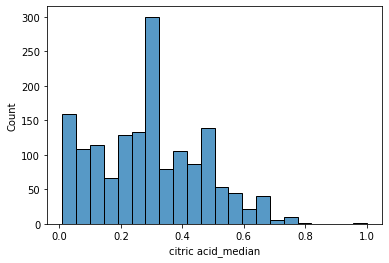

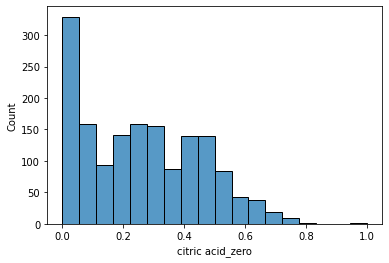

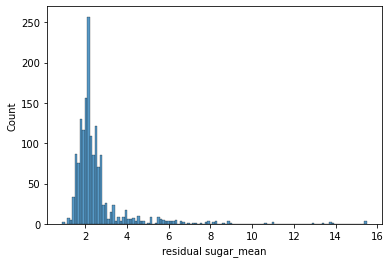

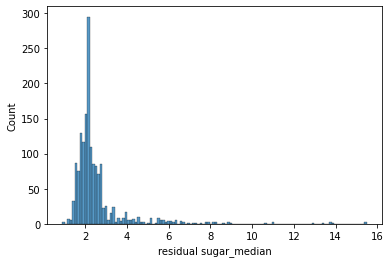

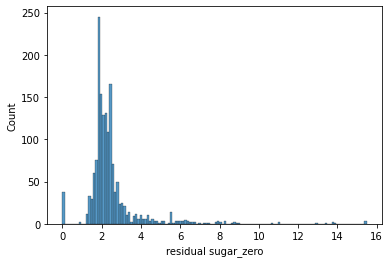

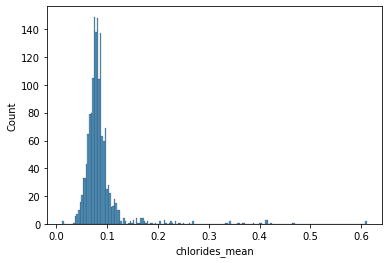

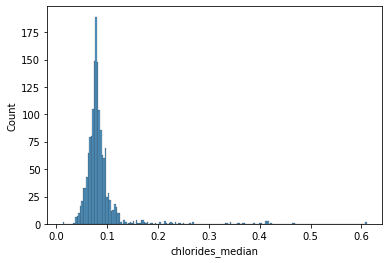

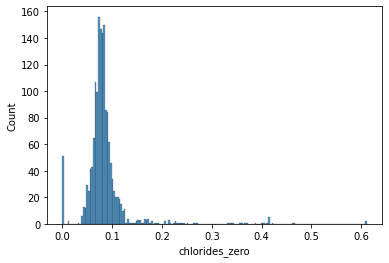

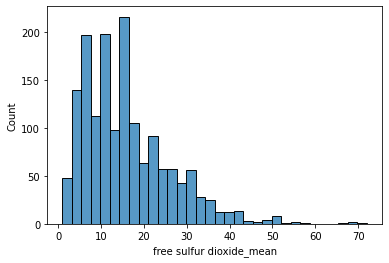

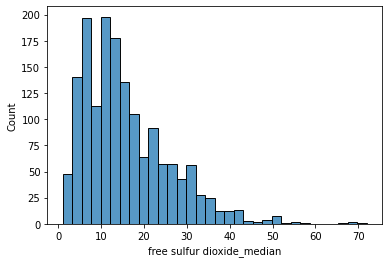

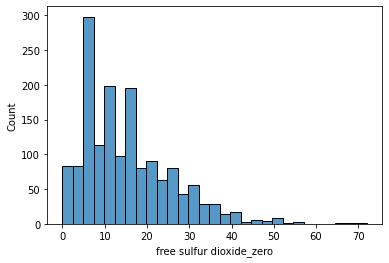

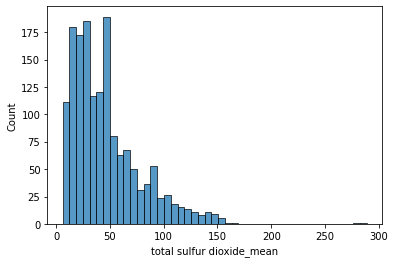

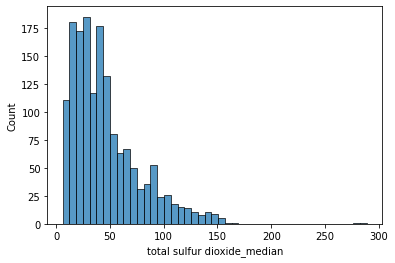

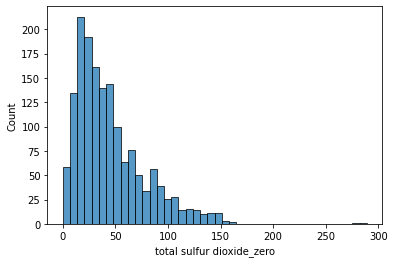

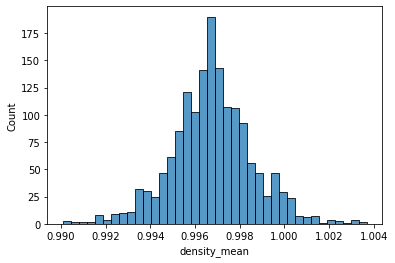

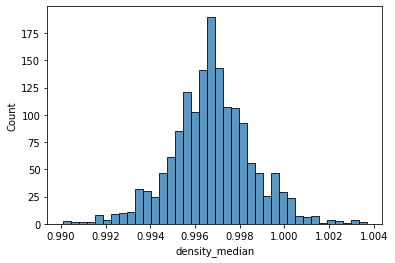

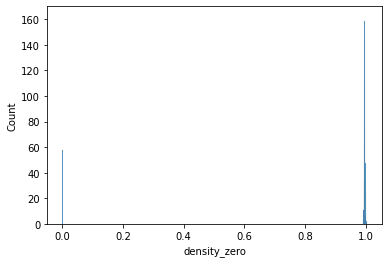

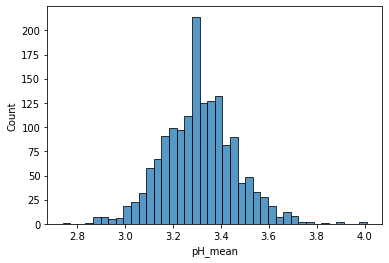

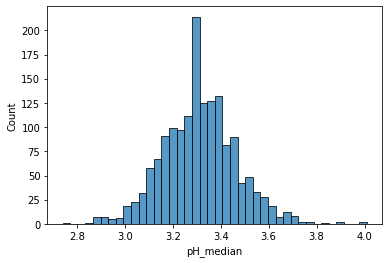

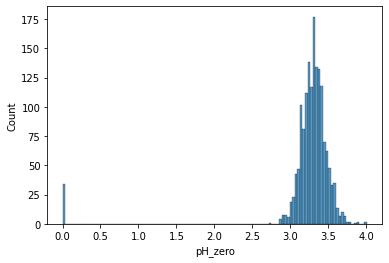

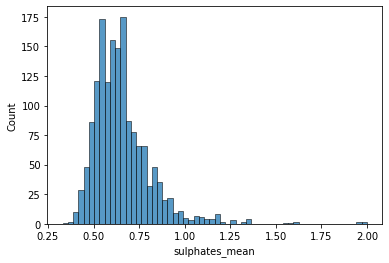

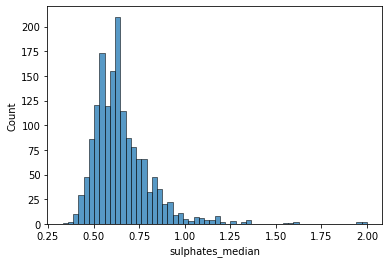

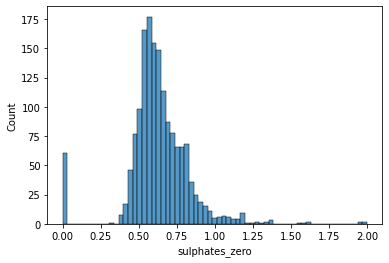

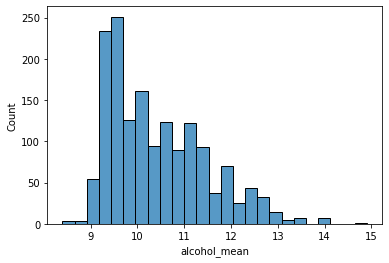

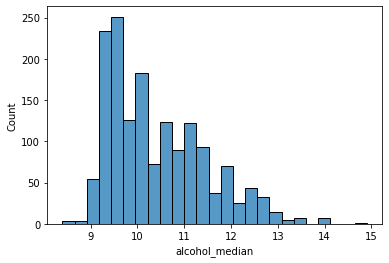

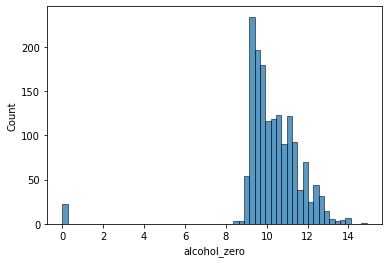

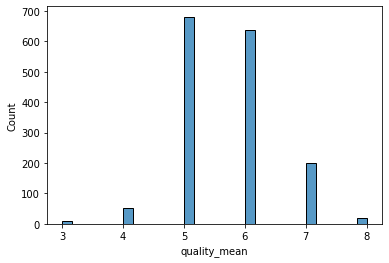

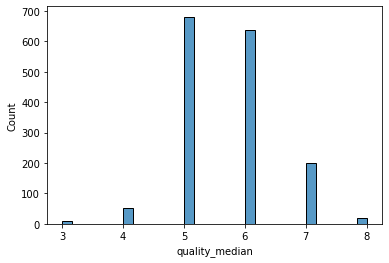

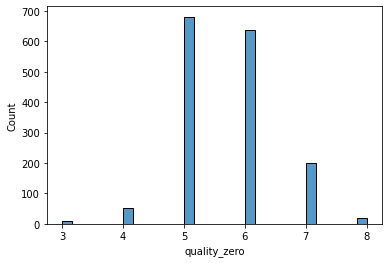

In [12]:
mpl.rcParams['figure.max_open_warning'] = 40
for i , feature in enumerate(features):
    plt.figure((3*i))
    df[f'{feature}_mean'] = df[feature]
    df[f'{feature}_mean'] = df[feature].fillna(df[feature].mean())
    sns.histplot(data = df , x = f'{feature}_mean')
    plt.figure((3*i+1))
    df[f'{feature}_median'] = df[feature]
    df[f'{feature}_median'] = df[feature].fillna(df[feature].median())
    sns.histplot(data = df , x = f'{feature}_median')
    plt.figure((3*i+2))
    df[f'{feature}_zero'] = df[feature]
    df[f'{feature}_zero'] = df[feature].fillna(0)
    sns.histplot(data = df , x = f'{feature}_zero')

In [14]:
import numpy as np
split = (3+8)/2
df['quality_binary'] = np.where(df.quality >= split , 'Good' , 'Bad')

B. Implement KNN function, my_KNN, to classify the good and bad wine quality. (10 pts)

In [ ]:
import numpy as np

def eucledian(p1 , p2):
    return np.sqrt(np.sum((p1-p2)**2))

def my_KNN(x_train , y , x_input , k):
    '''
    x_train: array of training x values
    y: corresponding label of y values
    x_input: array of test x values
    k : number of neighbors
    '''
    pred_labels = []
    
    for x_test in x_input:
        
        pt_dist = []
        
        for j in range(len(x_train)):
            distances = eucledian(np.array(x_train[j , :]) , x_test)
            pt_dist.append(distances)
            
        pt_dist = np.array(pt_dist)
        
        dist = np.argsort(pt_dist)[:k]
        labels = y[dist]
        
        
        
    
    

In [19]:
a = np.array([2 , 3, 4, 5])
a[2]

4

C. Implement LDA, my_LDA, to classify the good and bad wine quality. (15 pts)

D. Implement Logistic Regression, my_LogisticRegression, to classify the wine quality. (20 pts)

E. Use the implemented classifiers and report the accuracy of classifications. Present the result in dataframe. (5 pts)